In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
pd.set_option('max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')


In [44]:
data=pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#                                    Exploratory Data Analysis 
## 1. Separating  Target from Features 
## 2. To check whether a Class Imbalance Problem or not

In [45]:
y=data['Outcome']
X=data.drop(['Outcome'],axis=1)

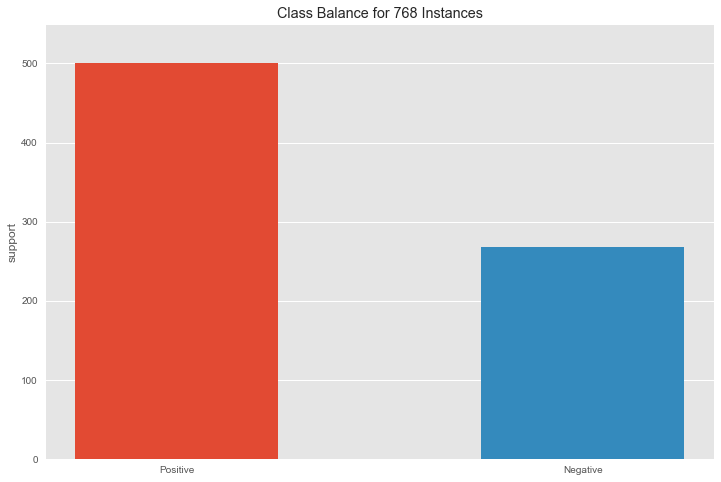

Positive Number Of Diabetes  500
Negative Number of Diabetes 268


In [14]:
from yellowbrick.target import ClassBalance
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = (12,8)
visualizer = ClassBalance (labels=['Positive','Negative']).fit(y)
visualizer.show()
Positive,Negative=y.value_counts()
print("Positive Number Of Diabetes ",Positive)
print("Negative Number of Diabetes",Negative)

In [19]:
import seaborn as sns

## Data Normalization of the Data 


In [21]:
data = X
#normalization of the data
data_std=(data-data.mean())/data.std()
#data_std all rows but first 10 columns
data=pd.concat([y,data_std.iloc[:,0:10]],axis=1)
#Pivot: Turn rows into columns.
#Unpivot: Turn columns into rows.
data=pd.melt(data,id_vars='Outcome',
             var_name='Features',
             value_name='value'
            )

## Volin Plot to check the distribution

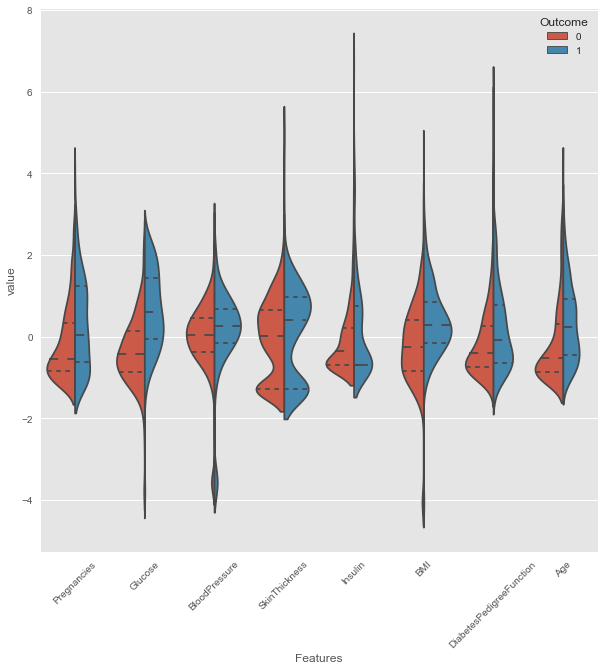

In [23]:
### Volin Plot To check the distribution
plt.figure(figsize=(10,10))
sns.violinplot(x='Features',y='value',hue='Outcome',data=data,split=True,inner='quartile')
plt.xticks(rotation=45);

## BoxPlot

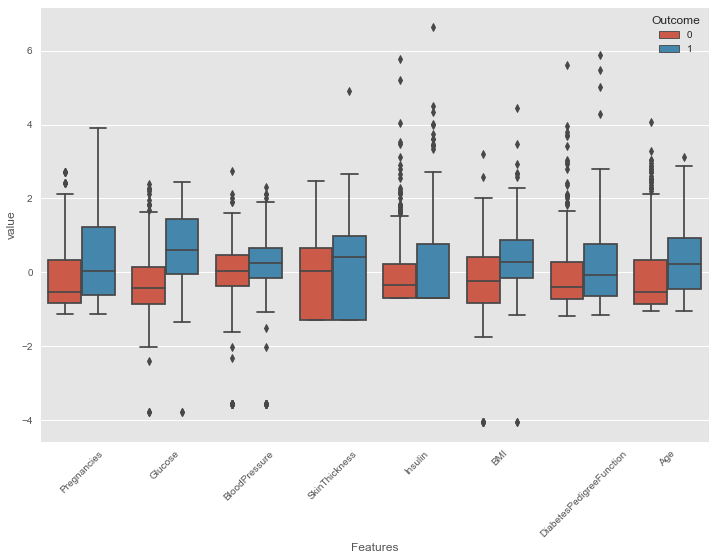

In [25]:
sns.boxplot(x='Features',y='value',hue='Outcome',data=data)
plt.xticks(rotation=45);

## Observing the Distribution of Values and their Variance with Swarm Plots


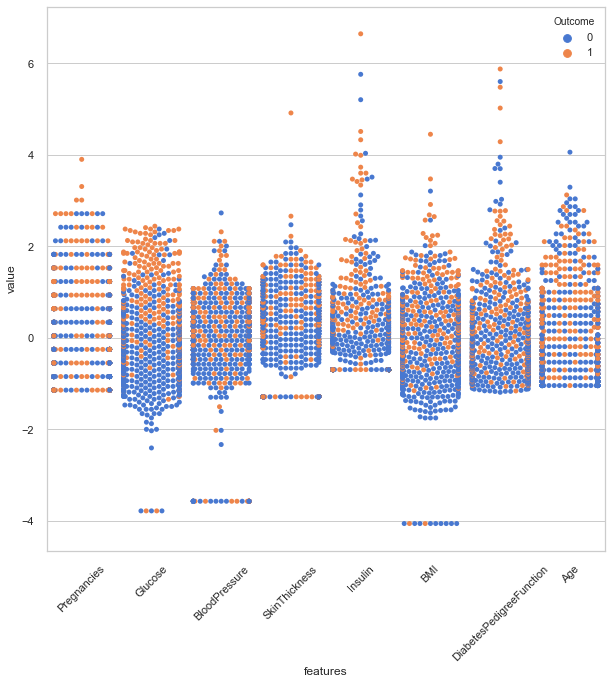

In [27]:
sns.set(style='whitegrid',palette='muted')
data = X
#normalization of the data
data_std=(data-data.mean())/data.std()
#data_std all rows but first 10 columns
data=pd.concat([y,data_std.iloc[:,0:10]],axis=1)
#Pivot: Turn rows into columns.
#Unpivot: Turn columns into rows.
data=pd.melt(data,id_vars='Outcome',
             var_name='features',
             value_name='value'
            )
plt.figure(figsize=(10,10))
sns.swarmplot(x='features',y='value',hue='Outcome',data=data)
plt.xticks(rotation=45);

# Observing all Pair-wise Correlations

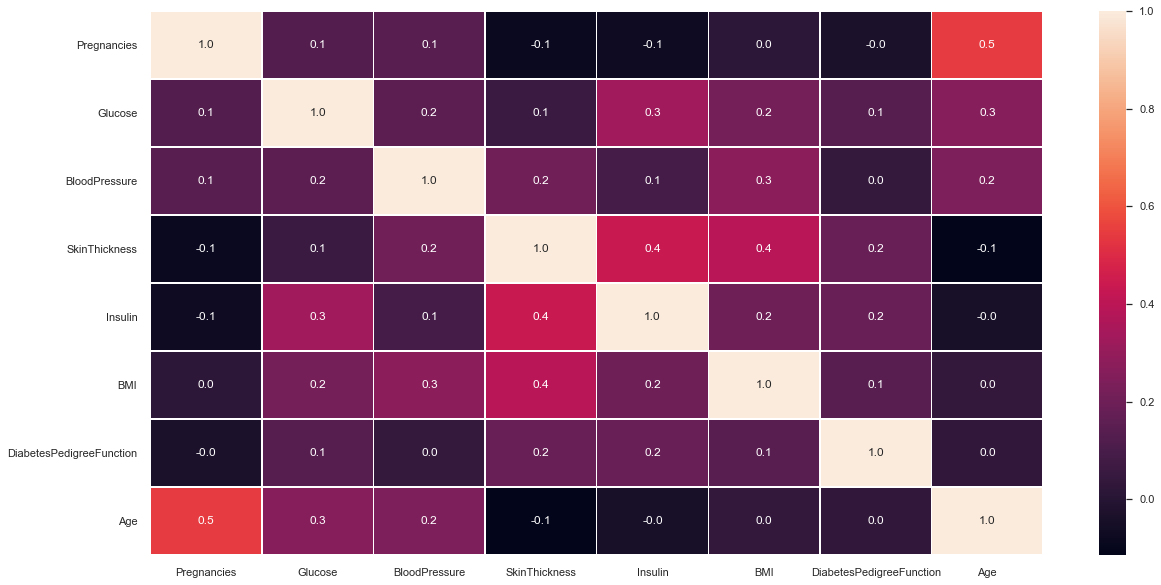

In [28]:
f, ax=plt.subplots(figsize=(20,10))
sns.heatmap(X.corr(),annot=True,linewidth=.5,fmt='.1f',ax=ax);

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score,confusion_matrix

#### Convert Dataframe To Nump.ndArray

In [46]:
X=X.values.astype(float)
y = data['Outcome'].values

####  Data Standardization give data zero mean and unit variance, it is good practice, especially for algorithms such as KNN which is based on distance of cases:

In [47]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[ 0.63994726,  0.84832379,  0.14964075,  0.90726993, -0.69289057,
         0.20401277,  0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575,  0.53090156, -0.69289057,
        -0.68442195, -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, -1.28821221, -0.69289057,
        -1.10325546,  0.60439732, -0.10558415],
       [-0.84488505, -0.99820778, -0.16054575,  0.15453319,  0.12330164,
        -0.49404308, -0.92076261, -1.04154944],
       [-1.14185152,  0.5040552 , -1.50468724,  0.90726993,  0.76583594,
         1.4097456 ,  5.4849091 , -0.0204964 ]])

In [83]:
X_train, X_test, y_train, y_test = train_test_split( X, y,test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (614, 8) (614,)
Test set: (154, 8) (154,)


### Classification¶
### K nearest neighbor (KNN)

In [84]:
from sklearn.neighbors import KNeighborsClassifier


## Before Implementing KNN nearest Neighbor Lest find the Best K 

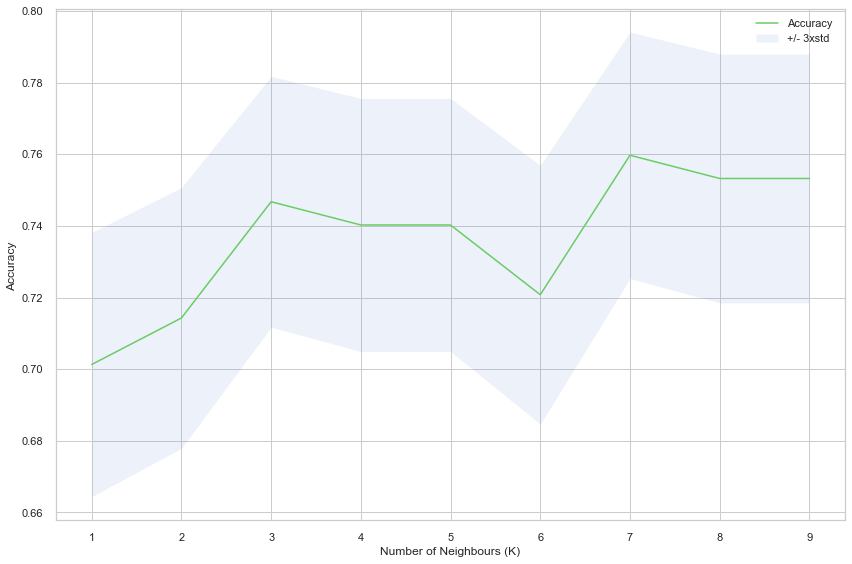

The best accuracy was with 0.7597402597402597 with k= 7


In [85]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbours (K)')
plt.tight_layout()
plt.show()
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

In [87]:
k = 7
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)

In [90]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([1, 0, 0, 0, 0], dtype=int64)

In [91]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.7980456026058632
Test set Accuracy:  0.7597402597402597


Accuracy is  0.7597402597402597


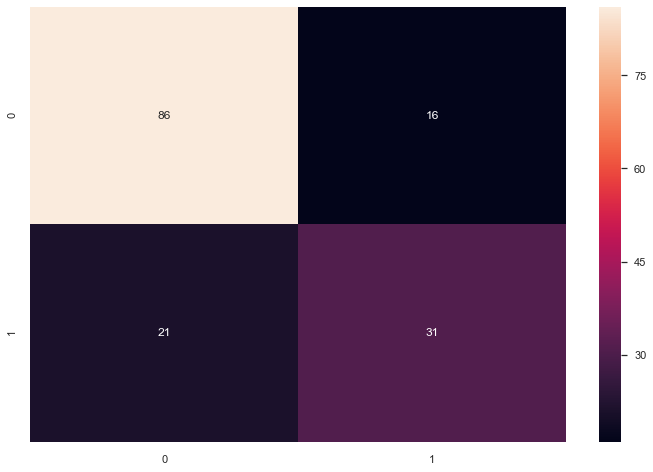

In [93]:
print("Accuracy is ",accuracy_score(y_test,yhat))
cm=confusion_matrix(y_test,yhat)
sns.heatmap(cm,annot=True,fmt='d');

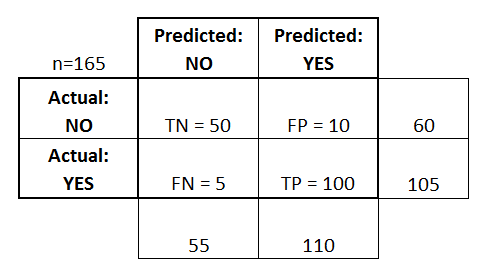

In [ ]:
print 'Confusion Matrix :'
print(cm) 

In [ ]:
das